# Tenis Ace Starting

##### Overview
This project contains a series of open-ended requirements which describe the project you’ll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem.

#### Project Goals
You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the [Association of Tennis Professionals (ATP)](https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals) data, you will determine what it takes to be one of the best tennis players in the world.

1. In order to complete this project, you should have completed the Linear Regression and Multiple Linear Regression lessons in the Machine Learning Course. This content is also covered in the Data Scientist Career Path.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

__Project Requirements__

2. “Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in __tennis_stats.csv__ is data from the men’s professional tennis league, which is called the [Association of Tennis Professionals (ATP)](https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals). Data from the top 1500 ranked players in the ATP over the span of ``2009`` to ``2017`` are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

Open the hint for more information about each column of the dataset.

In [2]:
tennis = pd.read_csv('tennis_stats.csv')
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


3. Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

In [3]:
tennis.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1721.0,2013.646717,2.488018,2009.00,2012.00,2014.00,2016.00,2017.00
FirstServe,1721.0,0.598053,0.054533,0.36,0.57,0.60,0.63,0.88
FirstServePointsWon,1721.0,0.680738,0.070422,0.27,0.65,0.69,0.72,0.89
FirstServeReturnPointsWon,1721.0,0.261673,0.056639,0.00,0.24,0.27,0.29,0.48
SecondServePointsWon,1721.0,0.479733,0.066902,0.06,0.46,0.49,0.52,0.92
SecondServeReturnPointsWon,1721.0,0.466432,0.068447,0.00,0.44,0.48,0.50,0.75
Aces,1721.0,97.105171,137.966077,0.00,7.00,34.00,140.00,1185.00
BreakPointsConverted,1721.0,0.369407,0.162987,0.00,0.32,0.38,0.43,1.00
BreakPointsFaced,1721.0,112.003486,119.247651,1.00,15.00,55.00,201.00,507.00
BreakPointsOpportunities,1721.0,102.918071,122.761670,0.00,9.00,41.00,172.00,573.00


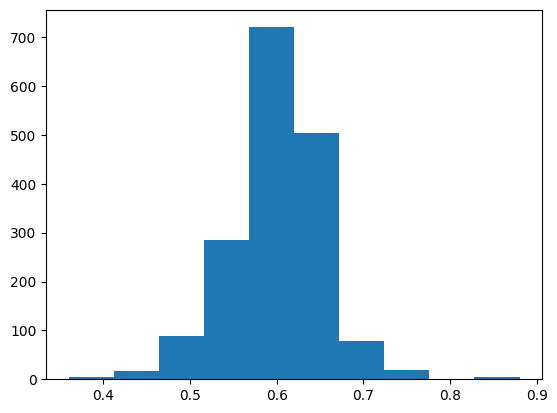

In [4]:
plt.hist(tennis['FirstServe'])
plt.show()

In [5]:
tennis['Year'].value_counts()

Year
2017    261
2016    250
2015    227
2014    210
2013    197
2012    167
2011    159
2010    140
2009    110
Name: count, dtype: int64

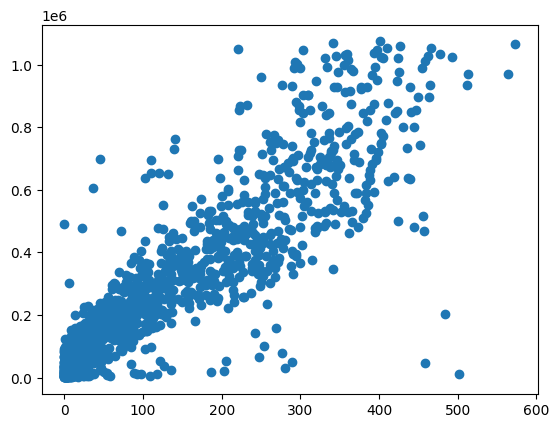

In [7]:
plt.scatter(tennis['BreakPointsOpportunities'], tennis['Winnings'])
plt.show()

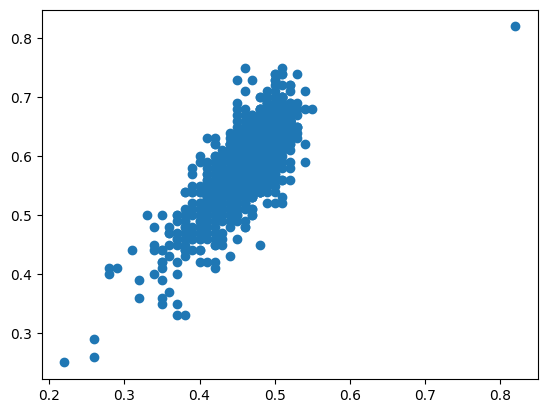

In [8]:
plt.scatter(tennis['TotalPointsWon'], tennis['TotalServicePointsWon'])
plt.show()

4. Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(tennis[['BreakPointsOpportunities']], tennis[['Winnings']], test_size=0.2, random_state=10)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Score model: {model.score(X_test, y_test)}')

Score model: 0.7769621373882858


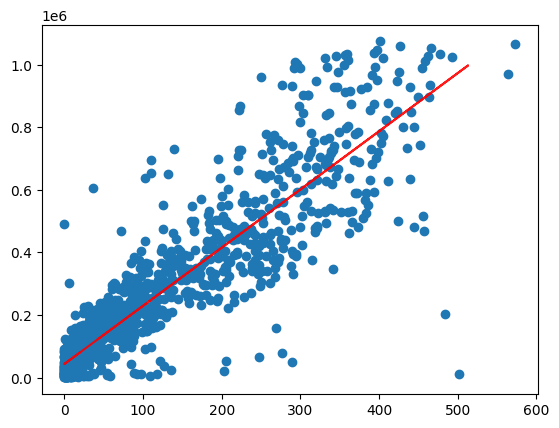

In [14]:
y_pred = model.predict(X_test)
plt.scatter(X_train, y_train)
plt.plot(X_test,y_pred, alpha=0.9, color='red')
plt.show()

5. Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

Score model: 0.5514040754763163


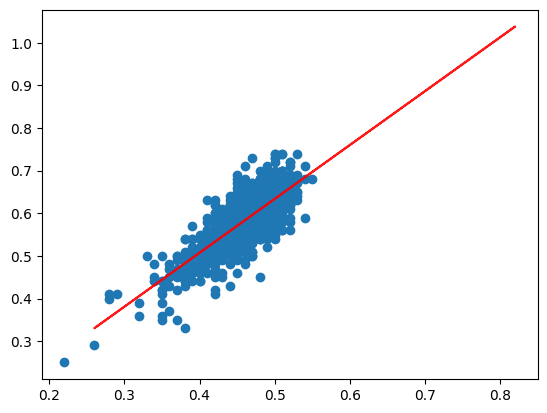

In [17]:
X_train, X_test, y_train, y_test = train_test_split(tennis[['TotalPointsWon']], tennis[['TotalServicePointsWon']], test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'Score model: {model.score(X_test, y_test)}')

y_pred = model.predict(X_test)
plt.scatter(X_train, y_train)
plt.plot(X_test,y_pred, alpha=0.9, color='red')
plt.show()

6. Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

In [20]:
X_train, X_test, y_train, y_test = train_test_split(tennis[['TotalPointsWon', 'BreakPointsOpportunities']], tennis[['Winnings']], test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'Score model 1: {model.score(X_test, y_test)}')


X_train, X_test, y_train, y_test = train_test_split(tennis[['TotalPointsWon', 'Aces']], tennis[['Winnings']], test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'Score model 2: {model.score(X_test, y_test)}')


X_train, X_test, y_train, y_test = train_test_split(tennis[['BreakPointsConverted', 'FirstServePointsWon']], tennis[['Winnings']], test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'Score model 3: {model.score(X_test, y_test)}')

X_train, X_test, y_train, y_test = train_test_split(tennis[['SecondServePointsWon', 'SecondServeReturnPointsWon']], tennis[['Winnings']], test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'Score model 4: {model.score(X_test, y_test)}')

Score model 1: 0.7776269977659938
Score model 2: 0.6064086577393311
Score model 3: 0.16620937347012865
Score model 4: 0.1100012220920692


7. Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

Head to the Codecademy forums and share your set of features that resulted in the highest test score for predicting your outcome. What features are most important for being a successful tennis player?

In [21]:
X_train, X_test, y_train, y_test = train_test_split(tennis[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']], tennis[['Winnings']], test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'Score model: {model.score(X_test, y_test)}')

Score model: 0.8071974392805101


8. Great work! Visit our forums to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that’s okay! There are multiple ways to solve these projects, and you’ll learn more by seeing others’ code.